In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-05-20 to 2019-07-09 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

51


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
RUSL,30,5.163476,3.997765,1.281664,39.303502,3.627551
BRZU,30,7.739933,8.236832,0.934856,81.256021,7.626808
LBJ,30,5.200293,5.616564,0.918820,45.804774,7.729469
GDXX,30,7.545788,9.000686,0.833948,50.631192,12.050224
NUGT,30,11.413573,13.924311,0.816837,81.685714,17.417822
UST,30,0.950553,1.204767,0.756056,5.666152,1.744279
TYD,30,1.357487,1.774683,0.742558,7.834675,2.621356
EDC,30,3.560105,4.808358,0.732146,19.899137,6.267738
EET,30,2.366451,3.182538,0.731105,13.113280,4.599511


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted URE 0.798 -0.173
evicted UPW 0.704 -0.207
evicted DFEN 0.614 -0.121
evicted CHAU 0.597 -0.059
evicted LABU 0.528 -0.229
evicted JNUG 0.502 -0.249
evicted BRZU 0.482 -0.394
retry backlogs ['EDC', 'RXL', 'CURE', 'TQQQ', 'QLD', 'LBJ', 'UYG', 'ROM', 'FAS', 'BIB', 'SPXL', 'UWM', 'SSO', 'DZK', 'MVV', 'UPRO', 'TNA', 'PPLC', 'XPP', 'TMF', 'UST', 'DDM', 'MIDU', 'UBT', 'UMDD', 'SOXL', 'UYM', 'URTY', 'UXI', 'EET', 'NUGT', 'GDXX', 'EURL', 'SAA', 'JPNL', 'UDOW', 'UBIO', 'TECL', 'YINN', 'USD', 'FINU'] at 0.805/-0.52 - 1.642
evicted UYM 0.750 -0.427
evicted YINN 0.656 -0.063
evicted BIB 0.636 -0.310
evicted GDXX 0.538 -0.175
evicted LBJ 0.465 -0.264
retry backlogs ['UXI', 'EDC', 'RXL', 'PPLC', 'SPXL', 'QLD', 'UST', 'ROM', 'DDM', 'TMF', 'FAS', 'UMDD', 'XPP', 'TNA', 'UPRO', 'URTY', 'UYG', 'SSO', 'EURL', 'MIDU', 'UWM', 'UBIO', 'MVV', 'UDOW', 'UCC', 'NUGT', 'TECL', 'CURE', 'SOXL', 'EET', 'TYD', 'JPNL', 'DZK', 'SAA', 'USD', 'TQQQ'] at 0.810/-0.54 - 1.89
evicted XPP 0.662 -0.068
evicted UBIO 0.640 

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,2.634240,1.371133,-0.318678,1.725183,2.660240,3.342126,5.467165,1.892273,18.150015,1.867624
RUSL,30.0,5.163476,3.997765,-1.026472,1.649172,5.409609,8.248439,12.665445,1.281664,39.303502,3.627551
UBT,30.0,1.758978,2.486355,-2.935063,0.125215,0.943121,2.725234,7.829477,0.691492,11.412197,3.493592
UCC,30.0,1.973234,4.099219,-5.959743,-1.222628,2.911719,4.599205,11.046148,0.471688,12.229338,9.066746
FINU,30.0,2.221680,6.077974,-7.429561,-1.544863,1.879139,5.440648,13.759826,0.359001,13.334413,12.579854


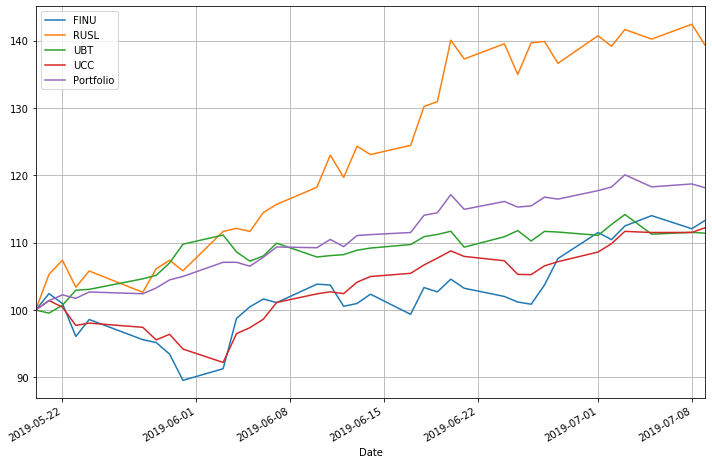

In [5]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1, backlogs_pos_threshold=.8)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,2.835600,1.499935,-0.170475,1.790727,2.704256,3.820117,5.947486,1.864026,19.749876,1.952675
RUSL,30.0,5.163476,3.997765,-1.026472,1.649172,5.409609,8.248439,12.665445,1.281664,39.303502,3.627551
UBT,30.0,1.758978,2.486355,-2.935063,0.125215,0.943121,2.725234,7.829477,0.691492,11.412197,3.493592
UCC,30.0,1.973234,4.099219,-5.959743,-1.222628,2.911719,4.599205,11.046148,0.471688,12.229338,9.066746
FINU,30.0,2.221680,6.077974,-7.429561,-1.544863,1.879139,5.440648,13.759826,0.359001,13.334413,12.579854


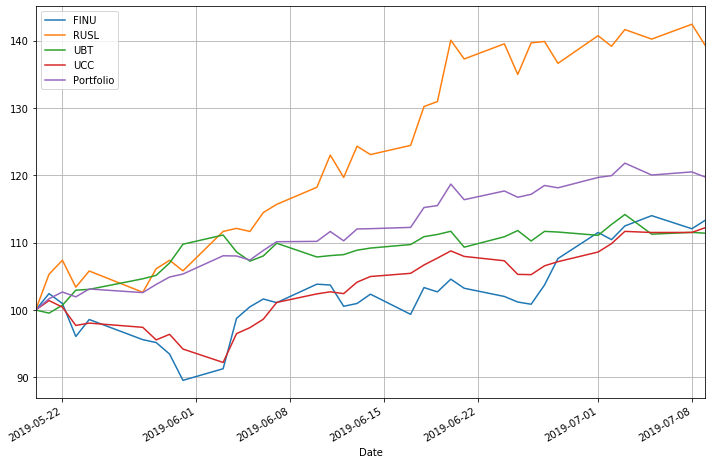

In [6]:
quote.graph({'FINU': 0.163, 'RUSL': 0.288, 'UBT': 0.55})

In [ ]:
quote2 = Quote(['TMF', 'SPXL'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)

In [ ]:
quote2 = Quote(['UBT', 'SSO'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)